In [14]:
import numpy as np
import matplotlib.pyplot as plt
import random 

In [15]:
# Générer le graphe TSP incomplet
def generate_tsp_incomplete(num_sommets, max_poids_arete):
    matrice = [[None for _ in range(num_sommets)] for _ in range(num_sommets)]
    intervalles = {} 
    for i in range(num_sommets):
        intervalle_start = random.randint(0, 10)
        intervalle_end = intervalle_start + random.randint(5, 100)
        intervalles[i] = (intervalle_start, intervalle_end)
    for i in range(num_sommets):
        for j in range(i + 1, num_sommets):
            if random.choice([True, False]):
                poids = random.randint(1, max_poids_arete)
                matrice[i][j] = poids
                matrice[j][i] = poids
    for i in range(num_sommets):
        pas_connexe = True
        for j in range(num_sommets):
            if matrice[i][j] is None:
                matrice[i][j] = float('inf')
            else:
                pas_connexe = False
        if pas_connexe:
            poids = random.randint(1, max_poids_arete)
            if i != (num_sommets-1):
                matrice[i][num_sommets-1] = poids
                matrice[num_sommets-1][i] = poids
            else:
                matrice[i][num_sommets-2] = poids
                matrice[num_sommets-2][i] = poids
    return np.array(matrice), intervalles 

In [16]:
num_sommets = 5
max_poids_arete = 10

# Générer les données du problème
tsp_matrice, tsp_intervalles = generate_tsp_incomplete(num_sommets, max_poids_arete)

# Afficher la matrice pondérée
print("\nMatrice pondérée:")
for row in tsp_matrice:
    print(row) 

# Afficher les intervalles
print("\nIntervalles des sommets")
print(tsp_intervalles)  


Matrice pondérée:
[inf inf inf  9. inf]
[inf inf 10.  7.  2.]
[inf 10. inf  6.  8.]
[ 9.  7.  6. inf  9.]
[inf  2.  8.  9. inf]

Intervalles des sommets
{0: (7, 36), 1: (7, 64), 2: (2, 97), 3: (1, 97), 4: (5, 25)}


In [17]:
def plot_tsp_matrice(tsp_matrice, tsp_intervalles):
    plt.figure(figsize=(10, 6))
    for i in range(len(tsp_matrice)):
        start_city = tsp_intervalles[tsp_matrice[i]]
        end_city = tsp_intervalles[tsp_matrice[(i + 1) % len(tsp_matrice)]]
        plt.plot([start_city[0], end_city[0]], [start_city[1], end_city[1]], 'bo-')
    
    for city in tsp_intervalles:
        plt.plot(city[0], city[1], 'ro')
    
    plt.title('Traveling Salesman Problem - Hill Climbing Solution')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show() 

In [18]:
def distance(city1, city2):
    return np.sqrt((city1[0] - city2[0]) ** 2 + (city1[1] - city2[1]) ** 2)

def total_distance(tsp_matrice, tsp_intervalles):
    return sum(distance(tsp_intervalles[tsp_matrice[i]], tsp_intervalles[tsp_matrice[(i + 1) % len(tsp_matrice)]]) for i in range(len(tsp_matrice)))

def get_neighbors(tsp_matrice):
    neighbors = []
    for i in range(len(tsp_matrice)):
        for j in range(i + 1, len(tsp_matrice)):
            neighbor = tsp_matrice.copy()
            neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
            neighbors.append(neighbor)
    return neighbors

def hill_climbing(tsp_intervalles):
    current_tsp_matrice = list(range(len(tsp_intervalles)))
    random.shuffle(current_tsp_matrice)
    current_distance = total_distance(current_tsp_matrice, tsp_intervalles)

    while True:
        neighbors = get_neighbors(current_tsp_matrice)
        next_tsp_matrice = min(neighbors, key=lambda tsp_matrice: total_distance(tsp_matrice, tsp_intervalles))
        next_distance = total_distance(next_tsp_matrice, tsp_intervalles)
        
        if next_distance >= current_distance:
            break
        
        current_tsp_matrice = next_tsp_matrice
        current_distance = next_distance

    return current_tsp_matrice, current_distance  

tsp_matrice: [8, 3, 0, 1, 5, 4, 9, 6, 2, 7]
Distance: 368.4519459949271


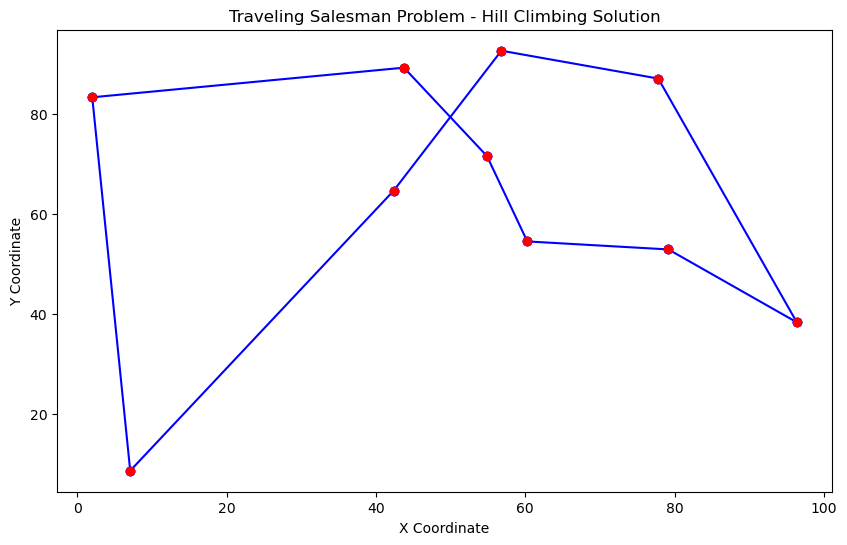

In [19]:
# Example usage:
np.random.seed(0)
num_tsp_intervalles = 10
tsp_intervalles = np.random.rand(num_tsp_intervalles, 2) * 100

tsp_matrice, distance = hill_climbing(tsp_intervalles)
print("tsp_matrice:", tsp_matrice)
print("Distance:", distance) 
plot_tsp_matrice(tsp_matrice, tsp_intervalles)  

In [3]:
# Générer le graphe TSP incomplet
def generate_tsp_incomplete(num_sommets, max_poids_arete):
    matrice = [[None for _ in range(num_sommets)] for _ in range(num_sommets)]
    intervalles = {}
    for i in range(num_sommets):
        intervalle_start = random.randint(0, 10)
        intervalle_end = intervalle_start + random.randint(5, 20)
        intervalles[i] = (intervalle_start, intervalle_end)
    for i in range(num_sommets):
        for j in range(i + 1, num_sommets):
            if random.choice([True, False]):
                poids = random.randint(1, max_poids_arete)
                matrice[i][j] = poids
                matrice[j][i] = poids
    for i in range(num_sommets):
        pas_connexe = True
        for j in range(num_sommets):
            if matrice[i][j] is None:
                matrice[i][j] = float('inf')
            else:
                pas_connexe = False
        if pas_connexe:
            poids = random.randint(1, max_poids_arete)
            matrice[i][num_sommets-1] = poids
            matrice[num_sommets-1][i] = poids
    return matrice, intervalles  

In [4]:
num_sommets = 5
max_poids_arete = 10

# Générer les données du problème
tsp_matrice, tsp_intervalles = generate_tsp_incomplete(num_sommets, max_poids_arete)

# Afficher la matrice pondérée
print("\nMatrice pondérée:")
for row in tsp_matrice:
    print(row) 

# Afficher les intervalles
print("\nIntervalles des sommets")
print(tsp_intervalles) 


Matrice pondérée:
[inf, 1, inf, inf, inf]
[1, inf, 4, 7, 4]
[inf, 4, inf, 5, 8]
[inf, 7, 5, inf, 7]
[inf, 4, 8, 7, inf]

Intervalles des sommets
{0: (0, 16), 1: (1, 6), 2: (1, 18), 3: (3, 8), 4: (7, 25)}


The solution is 
 [1, 3, 0, 4, 2] 
The path length is 
 inf


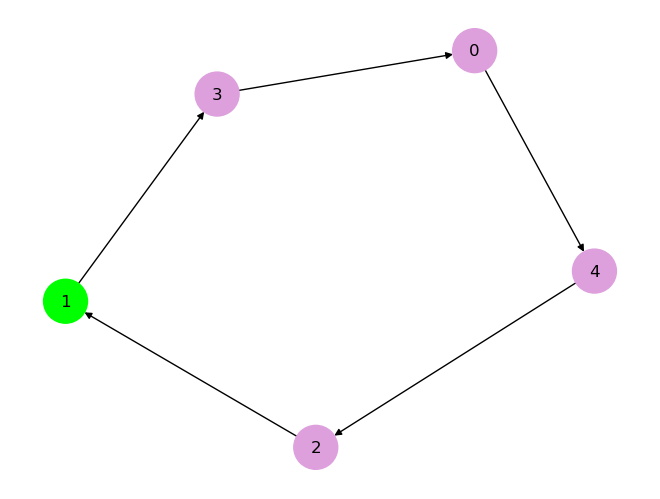

In [6]:
# Parameters
num_sommets = 5
max_poids_arete = 10

# Generate matrix and intervals
matrix, intervals = generate_tsp_incomplete(num_sommets, max_poids_arete)

# Visualize the solution
graph(matrix, intervals) 